### Exercise 6.1.1

Compute rβ,c,h(t) using N = 104 randomly chosen initial points. The function should take constants β, c, h and an array of t-values as parameters and return an array of values of rβ,c,h(t). To test it, for the parameter values β = 3, c = 0.5, and h = 104 evaluate rβ,c,h at
t = 400, 800, . . . , 8000 and sketch the graph of rβ,c,h. 

Useful functions: numpy.remainder(x,1) and numpy.random.rand(N).

In [524]:
import numpy as np
import pandas as pd

def compute_actual_r(N, beta, c, h, t):
    
    # Defining the hole start and hole end values
    hole_start = c - (1 / h)
    hole_end = c + (1 / h)

    # Getting random N number of points of range(0,1)
    x_arr = np.random.rand(N)
    x0_arr = x_arr.copy() # The initial array before it goes through the iteration
    
    # Initiliasing the iteration start point for each t value in consideration
    iteration_start = 1
    # Initialising the proportion of points remain after t iterations to an empty array
    proportion_of_points_remained = []

    # Iterating through different values in t
    for i in t:
        while iteration_start <= i: # To iterate until it reaches the ith value in t and remove the points escaped
            x1_arr = np.multiply(x0_arr, beta) # Multiplying the initial N points with beta - fβ : x → {βx}
            x1_arr = np.remainder(x1_arr, 1)  # Get only the fractional point of all the points in the resulted array - {x} = x − [x]
            hole_range = (x1_arr >= hole_start) & (x1_arr <= hole_end) # Filter that defines the hole range
            res_arr = x1_arr[~hole_range] # Filtering out all the points that escaped through the hole and get the resulted array
            x0_arr = res_arr # the resulted array becomes the initial array for the next iteration
            iteration_start+=1 # Increment the iteration_start so the while loop doesn't go indefinitely
        number_of_points_escaped = len(x_arr) - len(x0_arr) 
        number_of_points_remained = len(x0_arr)
        proportion_of_points_remained_at_i = 1 - (number_of_points_escaped/N) # Can also be calulated as number_of_points_remained / N
        proportion_of_points_remained.append(proportion_of_points_remained_at_i) # Storing the proportions of remaining points at t value

    return proportion_of_points_remained # Returning an array of values of rβ,c,h(t)
 
# Passing values for the function parameters
N = 10**4 
beta = 3
c = 0.5
h = 10**4
t_values = np.arange(400, 8001, 400) # Getting an array of t values start from 400 and increments every 400 until it is 8000 (eg. 400, 800,..,8000)
escape_rate = compute_actual_r(N, beta, c, h, t_values) # Calling the function to calculate the proportion of remaining points or escape rate when t increases
r_values = [f"{p:.4f}" for p in escape_rate] # Rounding off the decimal points to 4 points - can lose some precision

# Putting t_values and r_values into a dataframe for later use
data = pd.DataFrame({"t_values": t_values, "r_values": r_values})
data_precise = pd.DataFrame({"t_values": t_values, "r_values_precise": escape_rate})
# Printing out the proportions of points remaining at every t
print("The proportions of points remaining (r_values) after every t iterations (t_values):")
print(data)

The proportions of points remaining (r_values) after every t iterations (t_values):
    t_values r_values
0        400   0.9470
1        800   0.8916
2       1200   0.8447
3       1600   0.8055
4       2000   0.7681
5       2400   0.7267
6       2800   0.6879
7       3200   0.6539
8       3600   0.6190
9       4000   0.5842
10      4400   0.5522
11      4800   0.5236
12      5200   0.4960
13      5600   0.4697
14      6000   0.4457
15      6400   0.4234
16      6800   0.4023
17      7200   0.3824
18      7600   0.3629
19      8000   0.3443


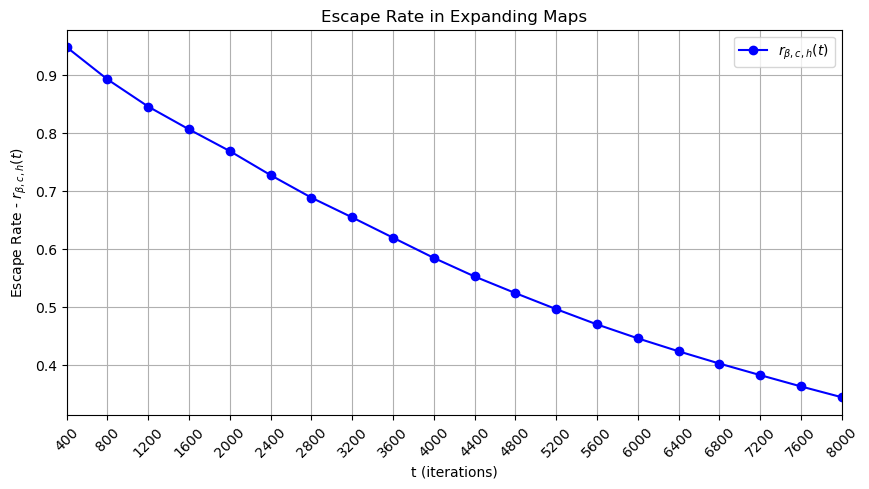

In [525]:
import matplotlib.pyplot as plt

# Graphing the results 
plt.figure(figsize=(10, 5)) 

# Plotting t value in the x-axis versus proportion of points remaining at its t value in the y-axis
plt.plot(data_precise['t_values'],data_precise['r_values_precise'], color="blue", marker="o", label=r"$r_{\beta,c,h}(t)$") # using data_precise instead of data as it stores escape rate (r) values precisely than the decimal round off done for r_values
plt.xticks(t_values, rotation=45)  # Setting ticks at each 400 step and rotates it to 45 degrees for readability
plt.xlim([t_values[0], t_values[-1]])  # Setting x-axis range from first to last t
plt.xlabel("t (iterations)")
plt.ylabel(r"Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mahematical notation correctly
plt.title("Escape Rate in Expanding Maps")
plt.grid()
plt.legend()
plt.show()

### Exercise 6.1.2. 
Implement the Gaussian approximation; the function should take a data set and degree as parameters and return coefficients of the approximating polynomial together with the error. Use it to guesstimate rβ,c,h(t) by a polynomial of degree ≤ 5, using the output from
Exercise 6.1.1. Plot the data points and the approximating function.

#### Solution Approach

1. Writing a funtion to implement gaussian approximation using normal equations to minimise Error
2. Writing a funtion to implement gaussian approximation using SVD to minimise Error
3. Comparing both the results and selecting the one with minimised Error

----------------------------------------------------------------------------------------------------
Mean Squared Error for Gaussian Approximation using Normal Equations: 0.00000515

The coefficients of the fitted approximating polynomial are:
[ 0.9884702632 -0.0001215882  0.0000000052]
----------------------------------------------------------------------------------------------------


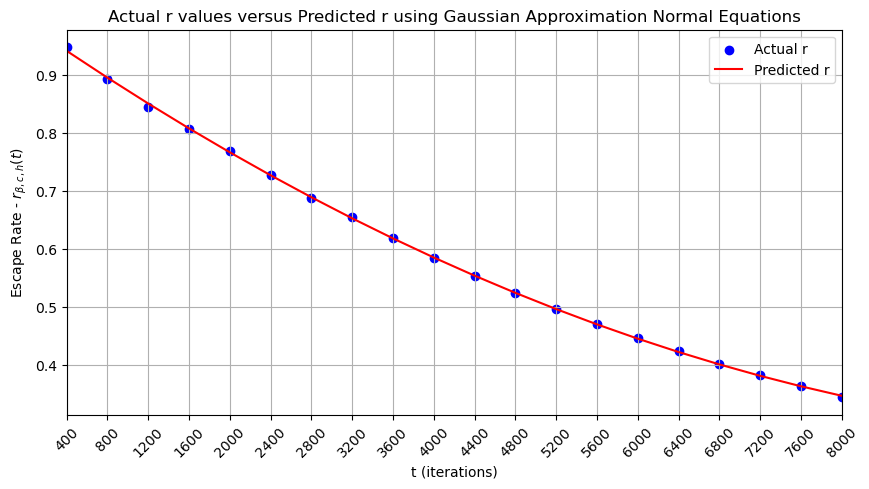

In [526]:
# Implementing Gaussian Approximation using Normal Equations
def gaussian_approximation_normal_equations(data, degree):

    # Retreiving the input and output variables (t_values and r_values from the data)
    t_values = data['t_values']
    r_values = data['r_values_precise']
    
    # Expressing polynomial of degree n in a matrix called Phi_x
    Phi_x = np.vander(t_values, degree + 1, increasing=True)

    # Phi_x has full row rank, hence the normal equations can be defined
    # Computing A and b
    A = Phi_x.T @ Phi_x
    b = Phi_x.T @ r_values

    # Ax = b where x or the coefficents(α) can be solved using np.linalg.solve()
    alpha = np.linalg.solve(A, b)
    
    # Now we have an approximating polynomial that fits our escape rate funtion we can predict escape rate (r values) for t
    predicted_r = Phi_x @ alpha

    # Put the predicted r for the corresponding t in a dataframe (used for plotting later)
    data_predicted = pd.DataFrame({"t_values": t_values, "r_values_predicted": predicted_r})
    
    # Computing the Mean Squared Error (MSE) to check the gaussian approximation
    error = np.mean((r_values - predicted_r)**2)

    return data_predicted, alpha, error

data_ne = data_precise.copy()
degree = 2 # Fitting a quadratic polynomial as higher degrees have complex curves but quadratic fits fine with the data
data_predicted_ne, coefficients_ne, error_ne = gaussian_approximation_normal_equations(data_ne, degree)

# Printing out the Mean Squared Error for the polynomial approximation
print(100*'-')
print(f"Mean Squared Error for Gaussian Approximation using Normal Equations: {error_ne:.8f}\n")
print(f"The coefficients of the fitted approximating polynomial are:\n{coefficients_ne}")
print(100*'-')

# Plotting the actual r versus predicted r from the gaussian approximation using normal equations
plt.figure(figsize=[10, 5])
plt.scatter(data_ne['t_values'], data_ne['r_values_precise'], color='blue', label="Actual r")
plt.plot(data_predicted_ne['t_values'], data_predicted_ne['r_values_predicted'], color='red', label='Predicted r')
plt.xticks(t_values, rotation=45)  # Setting ticks at each 400 step and rotates it to 45 degrees for readability
plt.xlim([t_values[0], t_values[-1]])  # Setting x-axis range from first to last t
plt.xlabel("t (iterations)")
plt.ylabel(r"Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mahematical notation correctly
plt.title("Actual r values versus Predicted r using Gaussian Approximation Normal Equations")
plt.grid()
plt.legend()
plt.show()


----------------------------------------------------------------------------------------------------
Mean Squared Error for Gaussian Approximation using Singular Value Decomposition: 0.00000447
The difference in Mean Squared Error for Gaussian Approximation SVD - Normal Equations: -0.00000067
The coefficients of the fitted approximating polynomial are:
[ 0.9914024921 -0.0001253287  0.0000000063 -0.          ]
----------------------------------------------------------------------------------------------------


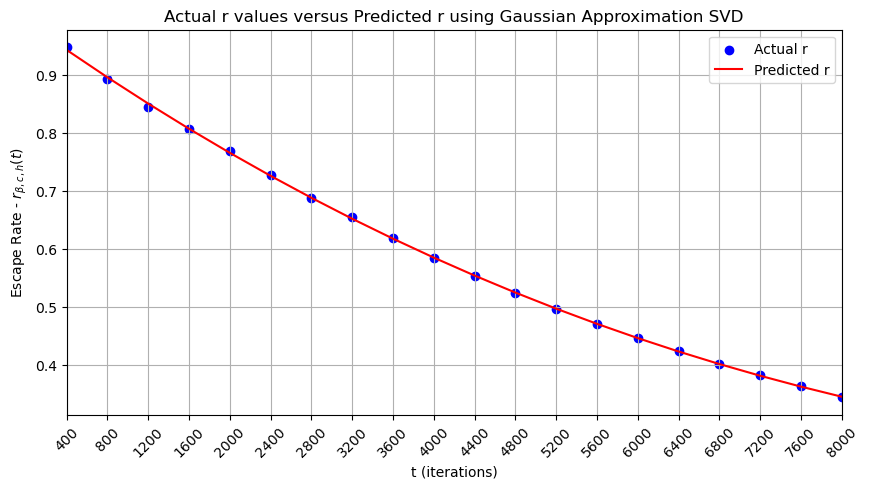

In [527]:
# Implementing Gaussian Approximation using Singular Value Decomposition (SVD)
def gaussian_approximation_svd(data, degree, t_r_data=True):

    if t_r_data: # Retreiving the input and output variables (t_values and r_values from the data)
        input_variable = data['t_values']
        output_variable = data['r_values_precise']
    else: # Condition to use the input and output variable appropriately for using later in Question 6.2.2
        input_variable = data['input']
        output_variable = data['output']
    
    # Expressing polynomial of degree n in a matrix called A
    A = np.vander(input_variable, degree + 1, increasing=True)

    # Computing U, sigma, V^T from the matrix A 
    U, sigma, V_t = np.linalg.svd(A, full_matrices=False)

    
    sigma_inverse = np.diag(1 / sigma) # Computing sigma inverse
    U_transpose_Y = U.T @ output_variable # Computing U^T * Y
    sigma_inverse_U_transpose_Y = sigma_inverse @ U_transpose_Y # Computing Σ^-1 * U^T * Y 
    alpha = V_t.T @ sigma_inverse_U_transpose_Y # Computing coefficients (alpha) finally
    
    # Now we have an approximating polynomial that fits our escape rate function we can predict escape rate (r values) for t
    predicted_output = A @ alpha

    # Put the predicted r for the corresponding t in a dataframe (used for plotting later)
    data_predicted = pd.DataFrame({"input_values": input_variable, "predicted_output": predicted_output})
    
    # Computing the Mean Squared Error (MSE) to check the gaussian approximation
    error = np.mean((output_variable - predicted_output)**2)

    return data_predicted, alpha, error

data_ga_svd = data_precise.copy()
degree = 3 # A cubic polynomial in SVD fits better than a quadratic polynomial 
data_predicted_svd, coefficients_svd, error_svd = gaussian_approximation_svd(data_ga_svd, degree)

# Printing out the Mean Squared Error for the polynomial approximation
print(100*'-')
print(f"Mean Squared Error for Gaussian Approximation using Singular Value Decomposition: {error_svd:.8f}")
error_diff = error_svd - error_ne
print(f"The difference in Mean Squared Error for Gaussian Approximation SVD - Normal Equations: {error_diff:.8f}")
print(f"The coefficients of the fitted approximating polynomial are:\n{coefficients_svd}")
print(100*'-')

# Plotting the actual r versus predicted r from the gaussian approximation using SVD
plt.figure(figsize=[10, 5])
plt.scatter(data_ga_svd['t_values'], data_ga_svd['r_values_precise'], color='blue', label="Actual r")
plt.plot(data_predicted_svd['input_values'], data_predicted_svd['predicted_output'], color='red', label='Predicted r')
plt.xticks(t_values, rotation=45)  # Setting ticks at each 400 step and rotates it to 45 degrees for readability
plt.xlim([t_values[0], t_values[-1]])  # Setting x-axis range from first to last t
plt.xlabel("t (iterations)")
plt.ylabel(r"Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mahematical notation correctly
plt.title("Actual r values versus Predicted r using Gaussian Approximation SVD")
plt.grid()
plt.legend()
plt.show()


#### Conclusion and Insights

The escape rate function was fitted with polynomial approximation using both Normal Equations and SVD and found the below insights:
1. Normal Equations had minimum error for polynomial with degree 2 but SVD had minimum error for polymial with degree 3
2. SVD polynomial with degree 3 fits better than Normal Equations polynomial with degree 2 as MSE is 0.00000500 lower in SVD than Normal Equations
3. Therefore, for the next problem we will use the MSE from the Gaussian Approximation fit using SVD for polynomial degree 3 to compare the Linear Regression Approximation

### Exercise 6.1.3

----------------------------------------------------------------------------------------------------
Mean Squared Error for Linear Regression Approximation using Singular Value Decomposition: 0.00001486
The difference in Mean Squared Error for Gaussian Approximation SVD and Linear Regression Approximation: -0.00001039
The coefficients of the fitted approximating linear regression are:
[-0.0031440523 -0.0001334227]
----------------------------------------------------------------------------------------------------


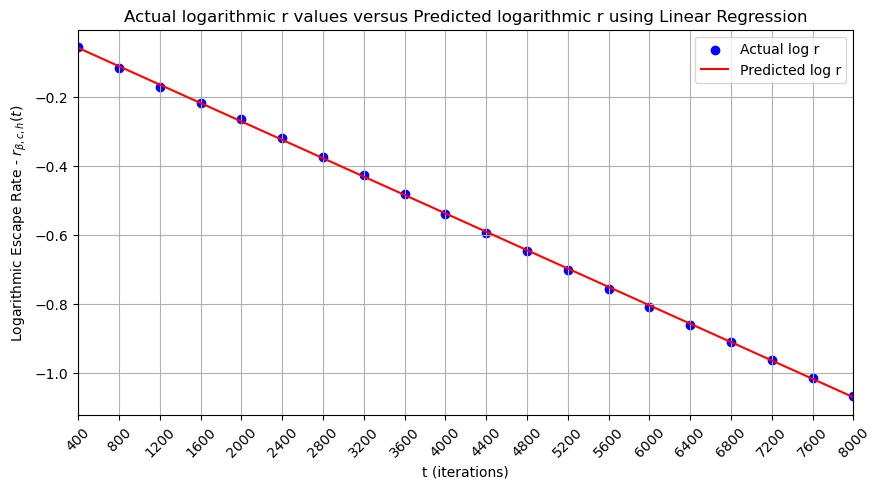

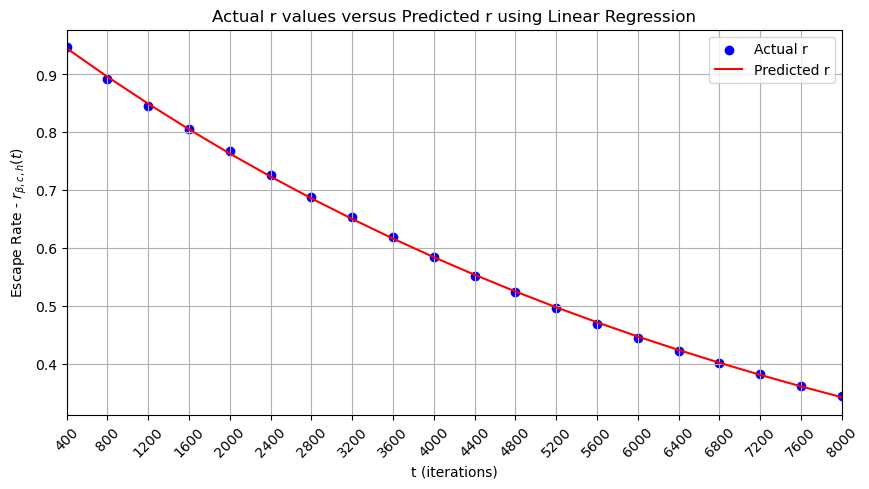

In [528]:
# Implementing Linear Regression

def linear_regression(data):

    # Retreiving the input and output variables (t_values and r_values from the data)
    t_values = data['t_values']
    r_values = data['r_values_precise']
    
    # Converting the output r values from 6.1.1 to logarithmic values
    log_r_values = np.log(r_values + 1e-10) # Adding a small constant as log(0) is undefined and to handle an r_values that is 0
    
    # Expressing the linear system in a matrix called A
    A = np.vander(t_values, N=2, increasing=True) # Since linear system is similar to polynomial of degree 1 we use N=degree + 1 to construct the matrix

    # Ax=b, we are solving for x or alpha coeffcients for the defined A and b=log_r_values
    # Computing U, sigma, V^T from the matrix A 
    U, sigma, V_t = np.linalg.svd(A, full_matrices=False)

    sigma_inverse = np.diag(1 / sigma) # Computing sigma inverse
    U_transpose_Y = U.T @ log_r_values # Computing U^T * Y
    sigma_inverse_U_transpose_Y = sigma_inverse @ U_transpose_Y # Computing Σ^-1 * U^T * Y 
    alpha = V_t.T @ sigma_inverse_U_transpose_Y # Computing coefficients (alpha) finally
    
    # Now we have a linear regrssion function that fits our escape rate function we can predict escape rate (r values) for t
    predicted_r_log = A @ alpha # since we fit the function for logarithmic r values we get the prediction in log values as well
    predicted_r = np.exp(predicted_r_log) # unsing np.exp() to undo the logarithmic transformation

    
    # Put the predicted r for the corresponding t in a dataframe (used for plotting later)
    data_predicted = pd.DataFrame({"t_values": t_values, "r_values_predicted": predicted_r, "log_r_values_predicted":predicted_r_log})
    
    # Computing the Mean Squared Error (MSE) to check the linear regression
    error = np.mean((log_r_values - predicted_r_log)**2)

    return data_predicted, alpha, error

data_lr = data_precise.copy()
data_predicted_lr, coefficients_lr, error_lr = linear_regression(data_lr)

# Printing out the Mean Squared Error for the Linear Regression approximation
print(100*'-')
print(f"Mean Squared Error for Linear Regression Approximation using Singular Value Decomposition: {error_lr:.8f}")
error_diff = error_svd - error_lr
print(f"The difference in Mean Squared Error for Gaussian Approximation SVD and Linear Regression Approximation: {error_diff:.8f}")
print(f"The coefficients of the fitted approximating linear regression are:\n{coefficients_lr}")
print(100*'-')

# With logarithmic - Plotting the actual log r versus predicted log r from the Linear Regression approximation
plt.figure(figsize=[10, 5])
log_r_values = np.log(data_lr['r_values_precise'] + 1e-10)
plt.scatter(data_lr['t_values'], log_r_values, color='blue', label="Actual log r")
plt.plot(data_predicted_lr['t_values'], data_predicted_lr['log_r_values_predicted'], color='red', label='Predicted log r')
plt.xticks(t_values, rotation=45)  # Setting ticks at each 400 step and rotates it to 45 degrees for readability
plt.xlim([t_values[0], t_values[-1]])  # Setting x-axis range from first to last t
plt.xlabel("t (iterations)")
plt.ylabel(r"Logarithmic Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mahematical notation correctly
plt.title("Actual logarithmic r values versus Predicted logarithmic r using Linear Regression")
plt.grid()
plt.legend()
plt.show()

# Undo logarithmic - Plotting the actual r versus predicted r from the Linear Regression approximation
plt.figure(figsize=[10, 5])
plt.scatter(data_lr['t_values'], data_lr['r_values_precise'], color='blue', label="Actual r")
plt.plot(data_predicted_lr['t_values'], data_predicted_lr['r_values_predicted'], color='red', label='Predicted r')
plt.xticks(t_values, rotation=45)  # Setting ticks at each 400 step and rotates it to 45 degrees for readability
plt.xlim([t_values[0], t_values[-1]])  # Setting x-axis range from first to last t
plt.xlabel("t (iterations)")
plt.ylabel(r"Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mahematical notation correctly
plt.title("Actual r values versus Predicted r using Linear Regression")
plt.grid()
plt.legend()
plt.show()

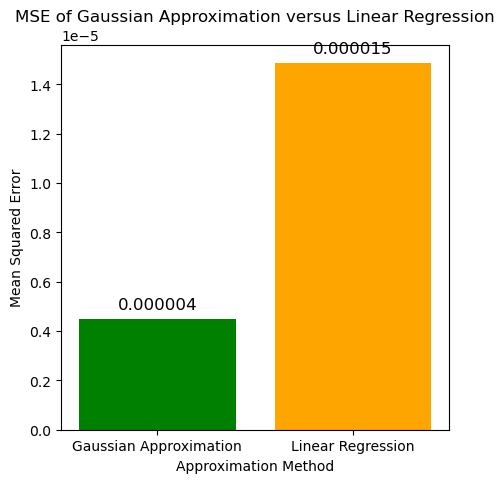

In [529]:
# Comparing the MSE of Gaussian Approximation and Linear Regression

errors = [error_svd, error_lr] # error_svd is the name given for gaussian approximation error 
labels = ["Gaussian Approximation", "Linear Regression"]
plt.figure(figsize=(5, 5))
bars = plt.bar(labels, errors, color=["green", "orange"])
plt.bar_label(bars, fmt="%.6f", fontsize=12, padding=5)
plt.xlabel("Approximation Method")
plt.ylabel("Mean Squared Error")
plt.title("MSE of Gaussian Approximation versus Linear Regression")
plt.show()



#### Which approximation gives smaller error?

The MSE of Gaussian Approximation solved using SVD of polynomial degree 3 is 0.00003099 (when running) lower than the MSE of Linear Regression method. Therefore we can conclude that the **Gaussian Approximation** gives smaller error than the Linear Regression Approximation

### Exercise 6.2.1

----------------------------------------------------------------------------------------------------
The hole (c) and its corresponding escape rate(B(c)) for the given beta and h values are:
[[ 0.0095815383 -0.0001991169]
 [ 0.1756092021 -0.0002053927]
 [ 0.2020778411 -0.0001968879]
 [ 0.3005893921 -0.0002009247]
 [ 0.3057433695 -0.0002001384]
 [ 0.4149738026 -0.0002011166]
 [ 0.4380200276 -0.0002035934]
 [ 0.4741566166 -0.0001978051]
 [ 0.5093206404 -0.0002037515]
 [ 0.5742141499 -0.0002039923]
 [ 0.599089235  -0.0001983291]
 [ 0.7173539499 -0.0002005011]
 [ 0.7630429328 -0.0002026601]
 [ 0.7900436948 -0.0001949693]
 [ 0.8563052893 -0.0002005783]
 [ 0.8968748618 -0.0001991253]
 [ 0.899795758  -0.0001959694]
 [ 0.9224246    -0.0002071362]
 [ 0.9248999252 -0.0002003764]
 [ 0.9495898294 -0.0001972242]]
----------------------------------------------------------------------------------------------------


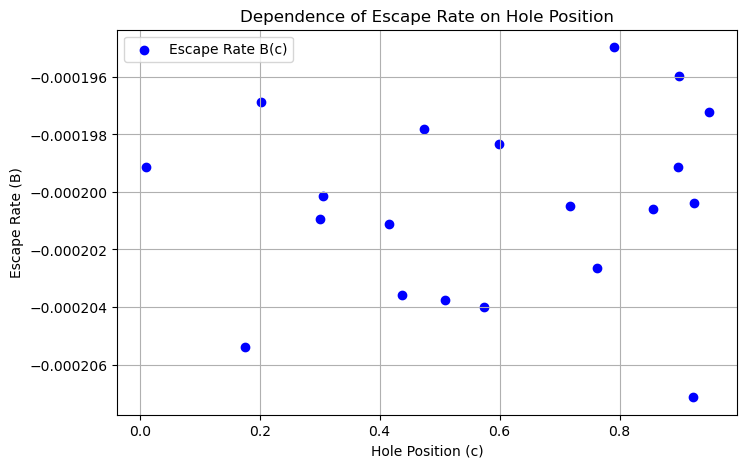

In [530]:
'''Dependence of Escape Rate on Hole'''

# Generate several random holes of range (0,1)
no_of_holes = 20
c = np.random.rand(20)
c.sort() # Sorting the hole values from smallest number to largest number

# Computing the r values for beta=3, h=10**4 and for all the above generated random holes
N=10**4
beta = 3
h = 10**4
t_values = np.arange(400, 8001, 400)
holes =[] # To store the hole under consideration so to map them to their corresponsing r values
actual_escape_rate=[] # To store all the actual r values to determine the escape rate 
predicted_escape_rate=[] # To store all the predicted r values to determine the escape rate 
escape_rate = [] # To store the escape rate (or slope) of each approximation for the specific hole
for hole in c:
    holes.append(hole) #Storing the hole (c) value for the corresponding escape rate (Bc) that is computed later
    actual_r_values = (compute_actual_r(N, beta, hole, h, t_values)) # Conputing the actual r for each random hole
    #escape_rate.append(actual_r_values) # Appending it to the initialised escape_rate to store in a dataframe

    # Sending the actual r and t values to the Linear Regression Function defined in 6.1.3 that already handles the log condition
    # As the function accepts the data as a dataframe of t and r values, we put them in a dataframe
    data_tr = pd.DataFrame({"t_values": t_values, "r_values_precise": actual_r_values})
    _, coefficients_lr, _ = linear_regression(data_tr) # Calling the function and we need only the coefficients that gives us B or the slope
    Bc = coefficients_lr[1] # Since there are two coefficients returned from the linear function - A - the y intercerpt and B-the slope or escape rate
    escape_rate.append(Bc) #Storing the computed escape rate (Bc) for the corresponding hole (c)

escape_rate_various_holes = pd.DataFrame({"hole": holes, "escape_rate": escape_rate})

# Outputting c,Bc in an array as aske din 6.2.1
np.set_printoptions(suppress=True, precision=10) # To remove the e and get the decimal format and not in scientific notation
c_Bc_array = escape_rate_various_holes.to_numpy()
print(100*'-')
print("The hole (c) and its corresponding escape rate(B(c)) for the given beta and h values are:")
print(c_Bc_array)
print(100*'-')


# Sketching a graph showing the dependence of the escape rate on various hole positions
plt.figure(figsize=(8, 5))
plt.scatter(escape_rate_various_holes['hole'], escape_rate_various_holes['escape_rate'], color="blue", label="Escape Rate B(c)")
plt.xlabel("Hole Position (c)")
plt.ylabel("Escape Rate (B)")
plt.title("Dependence of Escape Rate on Hole Position")
plt.legend()
plt.grid()
plt.show()


### Exercise 6.2.2

----------------------------------------------------------------------------------------------------
The MSE for the fitted polynomial of hte escape rate hole position funciton is:

8.718803506395185e-12
----------------------------------------------------------------------------------------------------
The predicted escape rate for the holes under consideration based on the fitted polynomial:

    input_values  predicted_output
0       0.009582         -0.000199
1       0.175609         -0.000202
2       0.202078         -0.000201
3       0.300589         -0.000200
4       0.305743         -0.000200
5       0.414974         -0.000201
6       0.438020         -0.000202
7       0.474157         -0.000202
8       0.509321         -0.000202
9       0.574214         -0.000202
10      0.599089         -0.000201
11      0.717354         -0.000199
12      0.763043         -0.000199
13      0.790044         -0.000199
14      0.856305         -0.000200
15      0.896875         -0.000200
16     

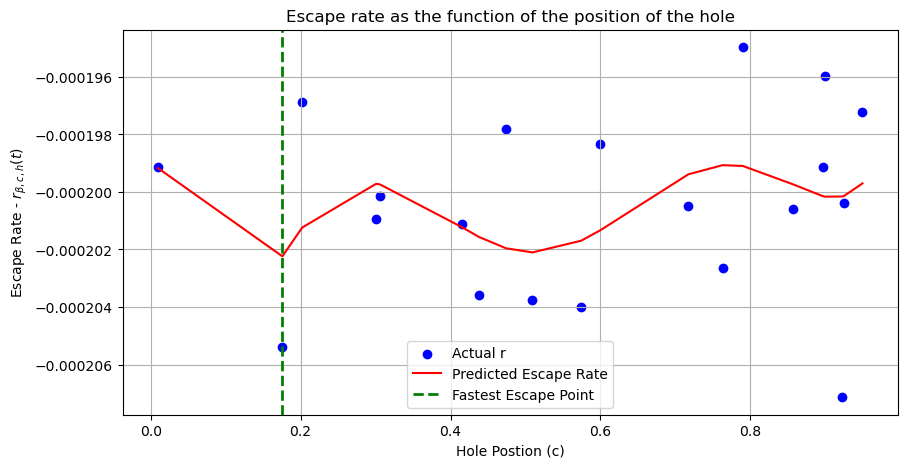

In [531]:
''' Studying the escape rate as the function of the position of the hole'''

# Getting the data from 6.2.1 that stored the various hole and the corresponding escape rate for the give n beta, h and t
# Store the hole and escape rate values as input and output fields which the Gaussian Approx function expects
esc_rate_data = pd.DataFrame({ 
    'input': escape_rate_various_holes['hole'],
    'output': escape_rate_various_holes['escape_rate']
})

degree = 7 # trail and error and found 7 as a better one (anything from 4 to 10 actually looks as a better fit and chose 7 to prevent overfitting)
predicted_esc_rate, coefficients, error_esc_rate = gaussian_approximation_svd(esc_rate_data, degree, t_r_data=False)

print(100*'-')
print("The MSE for the fitted polynomial of hte escape rate hole position funciton is:\n")
print(error_esc_rate)
print(100*'-')
print("The predicted escape rate for the holes under consideration based on the fitted polynomial:\n")
print(predicted_esc_rate) 
print(100*'-')

# Plotting the actual r versus predicted r from the gaussian approximation using SVD
plt.figure(figsize=[10, 5])
plt.scatter(esc_rate_data['input'], esc_rate_data['output'], color='blue', label="Actual r")
plt.plot(predicted_esc_rate['input_values'], predicted_esc_rate['predicted_output'], color='red', label='Predicted Escape Rate')
plt.xlabel("Hole Postion (c)")
plt.ylabel(r"Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mathematical notation correctly
plt.title("Escape rate as the function of the position of the hole")
plt.grid()

# Where should one put the hole for the fastest escape? this mean the escape rate should be the lowest or minimum among the random c or holes generates
fastest_escape_rate_index = np.argmin(predicted_esc_rate['predicted_output']) #Gets the index of the lowest Bc value

# Getting corresponding hole position
c_fastest_escape = predicted_esc_rate['input_values'].iloc[fastest_escape_rate_index]  

# Getting the fastest escape rate from the index
fastest_escape_rate = predicted_esc_rate['predicted_output'].iloc[fastest_escape_rate_index]

print(f"\nThe hole {c_fastest_escape} has the fastest escape rate {fastest_escape_rate} among the considered random holes")
print(100*'-')

# Drawing a vertical line at the hole position that has the fastest escape rate
plt.axvline(x=c_fastest_escape, color='green', linestyle='--', linewidth=2, label="Fastest Escape Point")
plt.legend()
plt.show()


### Exercise 6.2.3

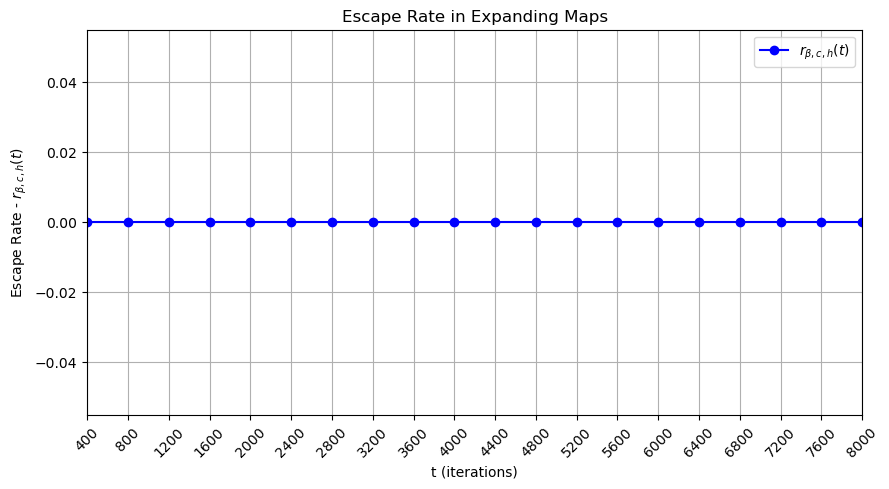

In [532]:
'''Studying what happens when beta is 2'''
 
# Passing values for the function parameters
N = 10**4 
beta = 2
c = 0.5
h = 10**4
t_values = np.arange(400, 8001, 400) # Getting an array of t values start from 400 and increments every 400 until it is 8000 (eg. 400, 800,..,8000)
escape_rate_2 = compute_actual_r(N, beta, c, h, t_values) # Calling the function to calculate the proportion of remaining points or escape rate when t increases
data_precise_2 = pd.DataFrame({"t_values": t_values, "r_values_precise": escape_rate_2})

# Graphing the results 
plt.figure(figsize=(10, 5)) 

# Plotting t value in the x-axis versus proportion of points remaining at its t value in the y-axis
plt.plot(data_precise_2['t_values'],data_precise_2['r_values_precise'], color="blue", marker="o", label=r"$r_{\beta,c,h}(t)$") # using data_precise instead of data as it stores escape rate (r) values precisely than the decimal round off done for r_values
plt.xticks(t_values, rotation=45)  # Setting ticks at each 400 step and rotates it to 45 degrees for readability
plt.xlim([t_values[0], t_values[-1]])  # Setting x-axis range from first to last t
plt.xlabel("t (iterations)")
plt.ylabel(r"Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mahematical notation correctly
plt.title("Escape Rate in Expanding Maps")
plt.grid()
plt.legend()
plt.show()



The proportions of points remaining over the iterations:
[0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915, 0.9915]
----------------------------------------------------------------------------------------------------


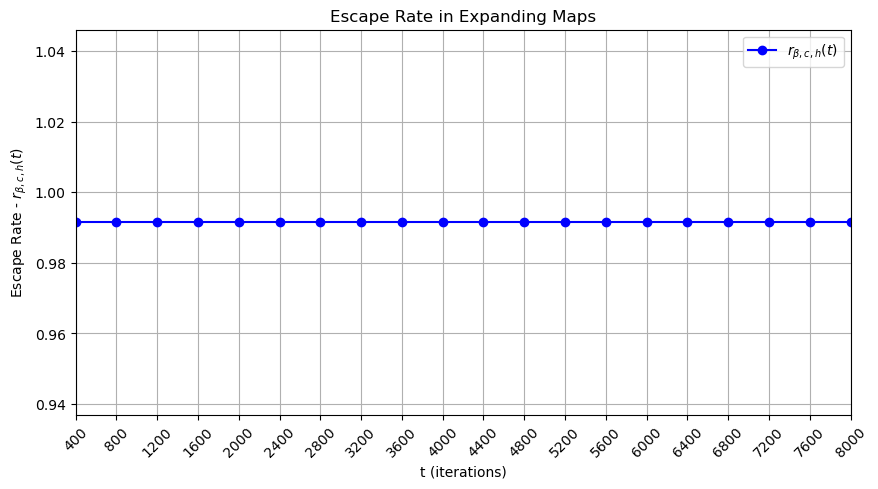

In [533]:
#Moving the hole elsewhere and plotting the graph
'''Studying what happens when beta is 2'''
 
# Passing values for the function parameters
N = 10**4 
beta = 2
c = 0.3 # Moved from 0.5 to 0.3
h = 10**4
t_values = np.arange(400, 8001, 400) # Getting an array of t values start from 400 and increments every 400 until it is 8000 (eg. 400, 800,..,8000)
escape_rate_2 = compute_actual_r(N, beta, c, h, t_values) # Calling the function to calculate the proportion of remaining points or escape rate when t increases
data_precise_2 = pd.DataFrame({"t_values": t_values, "r_values_precise": escape_rate_2})
print(f"The proportions of points remaining over the iterations:\n{escape_rate_2}")
print(100*'-')
# Graphing the results 
plt.figure(figsize=(10, 5)) 

# Plotting t value in the x-axis versus proportion of points remaining at its t value in the y-axis
plt.plot(data_precise_2['t_values'],data_precise_2['r_values_precise'], color="blue", marker="o", label=r"$r_{\beta,c,h}(t)$") # using data_precise instead of data as it stores escape rate (r) values precisely than the decimal round off done for r_values
plt.xticks(t_values, rotation=45)  # Setting ticks at each 400 step and rotates it to 45 degrees for readability
plt.xlim([t_values[0], t_values[-1]])  # Setting x-axis range from first to last t
plt.xlabel("t (iterations)")
plt.ylabel(r"Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mahematical notation correctly
plt.title("Escape Rate in Expanding Maps")
plt.grid()
plt.legend()
plt.show()



#### Explanation 1

**Understanding the behaviour of the r values when beta = 2 and hole = 0.5 and elsewhere**

**When center of hole = 0.5 and beta = 2:**

- Seems like all the points have quickly escaped even before hen t values are less than 400 unlike when beta was 3 for the same hole position

**Moving the hole - When center of hole = 0.3 and beta = 2:**

- Seems like there are 99% of points remaining without being escaped even after 8000 iterations!

**Conclusion:**

This behaviour is because after some n iterations all the random decimal points multiplied by 2 and removed the integer becomes some point within the range of the hole (0.5) therefore they escape. This is also why almost all the points cant escape once the hole is moved to a different point. 

**Next Step:**

Intrigued to find at what iteration all the points are escaped when beta = 2 and hole = 0.5

The proportions of points remaining over the iterations:
    t_values  r_values_precise
0          1            0.9997
1          2            0.9996
2          3            0.9996
3          4            0.9996
4          5            0.9995
5          6            0.9993
6          7            0.9990
7          8            0.9988
8          9            0.9984
9         10            0.9981
10        11            0.9979
11        12            0.9977
12        13            0.9973
13        14            0.9971
14        15            0.9970
15        16            0.9970
16        17            0.9966
17        18            0.9964
18        19            0.9963
19        20            0.9962
20        21            0.9961
21        22            0.9959
22        23            0.9955
23        24            0.9953
24        25            0.9950
25        26            0.9949
26        27            0.9947
27        28            0.9944
28        29            0.9944
29        30 

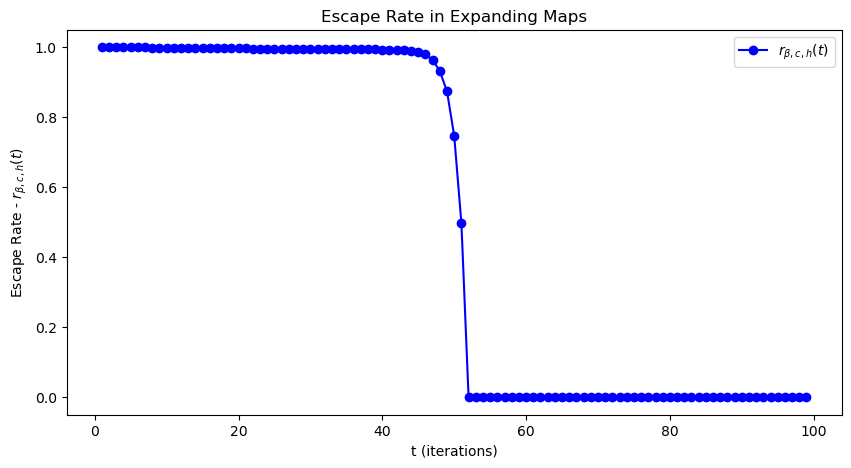

In [534]:
#Moving the hole elsewhere and plotting the graph
'''Studying what happens when beta is 2'''
 
# Passing values for the function parameters
N = 10**4 
beta = 2
c = 0.5 # Moved from 0.5 to 0.3
h = 10**4
t_values = np.arange(1, 100, 1) # Getting an array of t values start from 400 and increments every 400 until it is 8000 (eg. 400, 800,..,8000)
escape_rate_2 = compute_actual_r(N, beta, c, h, t_values) # Calling the function to calculate the proportion of remaining points or escape rate when t increases
data_precise_2 = pd.DataFrame({"t_values": t_values, "r_values_precise": escape_rate_2})
print(f"The proportions of points remaining over the iterations:\n{data_precise_2.head(60)}")
print(100*'-')
# Graphing the results 
plt.figure(figsize=(10, 5)) 

# Plotting t value in the x-axis versus proportion of points remaining at its t value in the y-axis
plt.plot(data_precise_2['t_values'],data_precise_2['r_values_precise'], color="blue", marker="o", label=r"$r_{\beta,c,h}(t)$") # using data_precise instead of data as it stores escape rate (r) values precisely than the decimal round off done for r_values
# plt.xticks(t_values, rotation=45) 
# plt.xlim([t_values[0], t_values[-1]])  
plt.xlabel("t (iterations)")
plt.ylabel(r"Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mahematical notation correctly
plt.title("Escape Rate in Expanding Maps")
plt.legend()
plt.show()



#### Explanation 2

**Insight:**

- There is a sudden drop  or escape of almost all the points from 40th iteration to 60th iteration. From the printed results we see rightly at 52nd iteration all the values have escaped and why at 52? 

- On further research the nature of this issue gets cleared:

     - Computers store floating point numbers as binary (base-2) and each number is stored in three parts with a totla of 64 bits.
     - The fractional part is stored as what is called "mantissa" as it is stored in 52 bits
     - When a number is doubled the binary representation is shifted left by one place.
     - So multiplying by 2 (essentially doubling) keeps shifting the (0s and 1s) binary number to the left.
     - Anytime the binary number becomes 1.10010101... it removes the leading 1 as per our function {x} = x - [x]
     - Toward the 52nd iteration (ones all the numbers in the 52 bit binary digits) are moved left the binary number is now 0.10000000.... 
     - And 0.1000000.... in binary to actual number is 0.5 and since our hole is around 0.5 all the points escape.
     - This is also the reason why no points escape after 52 itreations when the hole is moved elsewhere since at 53rd iteration the binary number is full of 0s which is the actual 0.
     - This all happens basically because of the limited 52 bit storage of decimal points where the precision is lost if there are decimal points that are infinite or more than 52 and doubling or multiplying can cause rounding off which leads to this issue of nature.

**Out of interest:**

The below cell consists of script to see how the binary shift happens at each iteration and how it gets to bianry value all 0s.


In [535]:
# Out of interest, checking the behaviour of the binary shift when doubling

# Funciton to convert decimal_to_binary
def decimal_to_binary(x, bits=52):
    binary_list = []
    for num in x:  
        binary = "0."
        temp = num
        for _ in range(bits):  
            temp *= 2
            if temp >= 1:
                binary += "1"
                temp -= 1
            else:
                binary += "0"
        binary_list.append(binary)
    return binary_list

# Writing the funciton again here to not mess the original function so can get some needed pritn statements inside th function

def compute_actual_r_intrigue(N, beta, c, h, t):
    
    # Defining the hole start and hole end values
    hole_start = c - (1 / h)
    hole_end = c + (1 / h)

    # Getting random N number of points of range(0,1)
    x_arr = np.random.rand(N)
    x0_arr = x_arr.copy() # The initial array before it goes through the iteration
    
    # Initiliasing the iteration start point for each t value in consideration
    iteration_start = 1
    # Initialising the proportion of points remain after t iterations to an empty array
    proportion_of_points_remained = []

    # Iterating through different values in t
    for i in t:
        while iteration_start <= i: # To iterate until it reaches the ith value in t and remove the points escaped
            x1_arr = np.multiply(x0_arr, beta) # Multiplying the initial N points with beta - fβ : x → {βx}
            x1_arr = np.remainder(x1_arr, 1)  # Get only the fractional point of all the points in the resulted array - {x} = x − [x]

            # Printing iteration number
            print(f"Iteration {iteration_start}:")
            print(f"Decimal values:\n{x1_arr} ...")

                        
            # Converting to binary and printing the binary values
            binary_representations = decimal_to_binary(x1_arr[:10])  # Converting only first 10 values for simpler output
            print("Binary representations:")
            for b in binary_representations:
                print(b)
            
            hole_range = (x1_arr >= hole_start) & (x1_arr <= hole_end) # Filter that defines the hole range
            res_arr = x1_arr[~hole_range] # Filtering out all the points that escaped through the hole and get the resulted array
            x0_arr = res_arr # the resulted array becomes the initial array for the next iteration
            iteration_start+=1 # Increment the iteration_start so the while loop doesn't go indefinitely
        number_of_points_escaped = len(x_arr) - len(x0_arr) 
        number_of_points_remained = len(x0_arr)
        proportion_of_points_remained_at_i = 1 - (number_of_points_escaped/N) # Can also be calulated as number_of_points_remained / N
        proportion_of_points_remained.append(proportion_of_points_remained_at_i) # Storing the proportions of remaining points at t value

    return proportion_of_points_remained # Returning an array of values of rβ,c,h(t)
    

N = 10**4 
beta = 2
c = 0.5
h = 10**4
t = np.arange(1, 55, 1) # Iterating until 55 as we now know all points escape after 52nd iteration
proportion_of_points_remaining = compute_actual_r_intrigue(N, beta, c, h, t)

Iteration 1:
Decimal values:
[0.3564818752 0.9031337062 0.8023421822 ... 0.7282346572 0.9454530898
 0.6101443714] ...
Binary representations:
0.0101101101000010011001010110101111000100101011001001
0.1110011100110011110001010100010000010101000000100100
0.1100110101100110010011000001100011110010101100101001
0.1000001011111100010101100111011011101010011111100011
0.1110110001010110011000011011011001111101110101101001
0.1001110101100101000001110000111011111011110001111100
0.1011111101000110011111010011100110011101000100000001
0.0000001100100000111001100000101001010011110000010011
0.1101111011001011101110111101001011100100000110111101
0.0100011100001010110110001010100110100101001110011011
Iteration 2:
Decimal values:
[0.7129637505 0.8062674124 0.6046843645 ... 0.4564693144 0.8909061796
 0.2202887428] ...
Binary representations:
0.1011011010000100110010101101011110001001010110010010
0.1100111001100111100010101000100000101010000001001000
0.1001101011001100100110000011000111100101011001010010
0

#### Explanation 3

As we can see from the above output that as the iteration goes, the bianry value shifts to the left thus leading by 0s successively and at 52nd iteration has only points that are 0.10000... which is 0.5 which is also our hole point

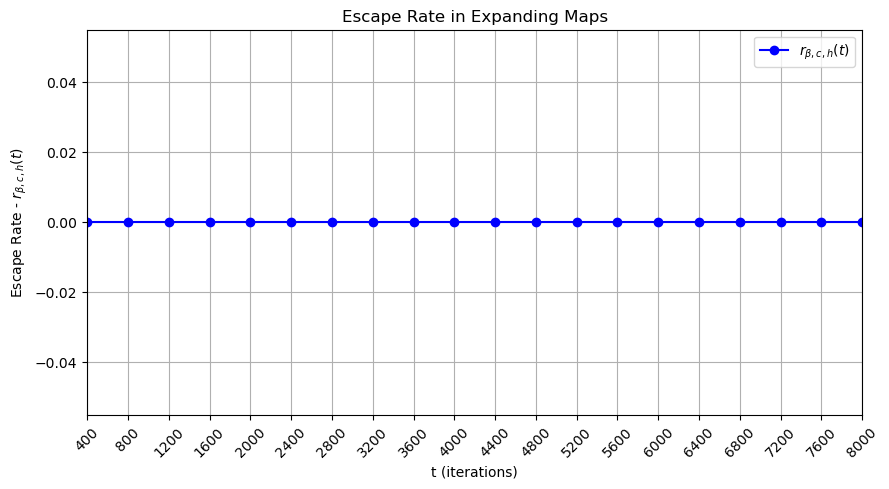

In [536]:
# Checking if other values of beta can have issue of similar nature
'''Now we know that doubling affects the floating poitn precision and this issue happens, 
so its obvious that the powers of 2 and most even numbers are going to have the similar issue of nature'''
 
# Passing values for the function parameters
N = 10**4 
beta = 6 # can be true for 8,16,... and certain even numbers
c = 0.5
h = 10**4
t_values = np.arange(400, 8001, 400) # Getting an array of t values start from 400 and increments every 400 until it is 8000 (eg. 400, 800,..,8000)
escape_rate_2 = compute_actual_r(N, beta, c, h, t_values) # Calling the function to calculate the proportion of remaining points or escape rate when t increases
data_precise_2 = pd.DataFrame({"t_values": t_values, "r_values_precise": escape_rate_2})
# Graphing the results 
plt.figure(figsize=(10, 5)) 

# Plotting t value in the x-axis versus proportion of points remaining at its t value in the y-axis
plt.plot(data_precise_2['t_values'],data_precise_2['r_values_precise'], color="blue", marker="o", label=r"$r_{\beta,c,h}(t)$") # using data_precise instead of data as it stores escape rate (r) values precisely than the decimal round off done for r_values
plt.xticks(t_values, rotation=45)  # Setting ticks at each 400 step and rotates it to 45 degrees for readability
plt.xlim([t_values[0], t_values[-1]])  # Setting x-axis range from first to last t
plt.xlabel("t (iterations)")
plt.ylabel(r"Escape Rate - $r_{\beta,c,h}(t)$") # Latex format to print out the mahematical notation correctly
plt.title("Escape Rate in Expanding Maps")
plt.grid()
plt.legend()
plt.show()




### Exercise 6.2.4


Proportion of points remaining at each t value:
At 400: 0.9256
At 800: 0.8533
At 1200: 0.7904
At 1600: 0.7324
At 2000: 0.6789
At 2400: 0.6274
At 2800: 0.5794
At 3200: 0.5342
At 3600: 0.4951
At 4000: 0.4565
At 4400: 0.4264
At 4800: 0.3973
At 5200: 0.3699
At 5600: 0.3436
At 6000: 0.3183
At 6400: 0.2929
At 6800: 0.2710
At 7200: 0.2509
At 7600: 0.2307
At 8000: 0.2100


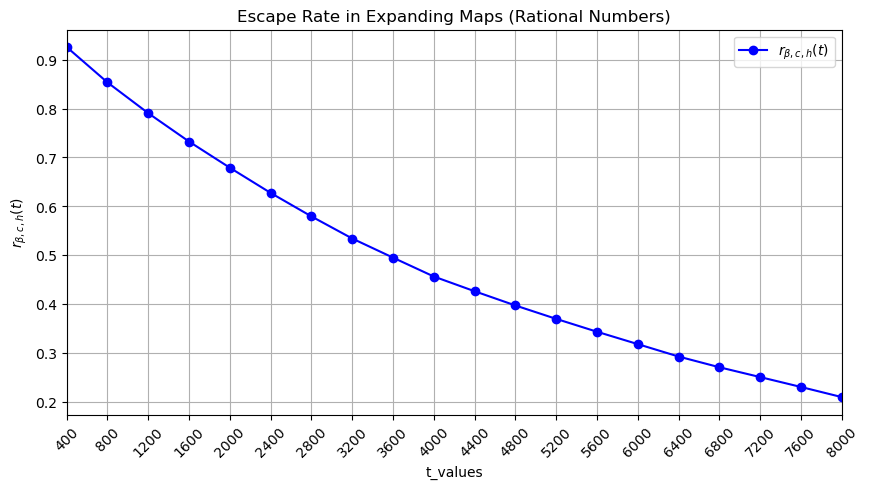

In [537]:
import numpy as np

def compute_actual_r_rational(N, beta, c, h, t):
    
    # Defining the hole start and hole end values
    hole_start = c - (1 / h)
    hole_end = c + (1 / h)

    # Generating initial N points as rational numbers
    denominators = np.full(N, 10**10)  # Large denominator to maintain precision
    numerators = np.random.randint(1, denominators[0], N)  # Random numerators

    # Storing numerators and denominators in a (2, N) array
    x_arr = np.vstack((numerators, denominators))

    # Initiliasing the iteration start point for each t value in consideration
    iteration_start = 1
    # Initialising the proportion of points remain after t iterations to an empty array
    proportion_of_points_remained = []

    # Iterating through different values in t
    for i in t:
        while iteration_start <= i: # To iterate until it reaches the ith value in t and remove the points escaped
            # Computing 2 * x = (2 * numerator) / denominator
            x_arr[0] = (2 * x_arr[0]) % x_arr[1] 

            # Converting to floating-point to check the escape through hole 
            x_float = x_arr[0] / x_arr[1]
            
            hole_range = (x_float >= hole_start) & (x_float <= hole_end) # Filter that defines the hole range
            x_arr = x_arr[:, ~hole_range] # Filtering out all the points that escaped through the hole and get the resulted array
            
            iteration_start+=1 # Increment the iteration_start so the while loop doesn't go indefinitely
        number_of_points_escaped = N - x_arr.shape[1]
        proportion_of_points_remained_at_i = 1 - (number_of_points_escaped/N) # Can also be calulated as number_of_points_remained / N
        proportion_of_points_remained.append(proportion_of_points_remained_at_i) # Storing the proportions of remaining points at t value

    return proportion_of_points_remained # Returning an array of values of rβ,c,h(t)


# Constants
N = 10**4
beta = 2  # Now handling beta = 2 with rational numbers
c = 0.5
h = 10**4
t = np.arange(400, 8001, 400)

# Computing escape rates
proportion_of_points_remaining = compute_actual_r_rational(N, beta, c, h, t)
proportion_of_points_remaining_at_t = [f"{p:.4f}" for p in proportion_of_points_remaining]

# Printing the results
print("\nProportion of points remaining at each t value:")
for ti, value in zip(t, proportion_of_points_remaining_at_t):
    print(f"At {ti}: {value}")


#Plottng the graphs
plt.figure(figsize=(10, 5))
plt.xticks(t, rotation=45)
plt.xlim([t[0], t[-1]])
plt.plot(t, proportion_of_points_remaining, color="blue", marker="o", linestyle="-", label=r"$r_{\beta,c,h}(t)$")
plt.xlabel("t_values")
plt.ylabel(r"$r_{\beta,c,h}(t)$")
plt.title("Escape Rate in Expanding Maps (Rational Numbers)")
plt.grid()
plt.legend()
plt.show()
